In [1]:
%load_ext autoreload
%autoreload 2

import anndata as ad
import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
from mmd_wrapper.utilities import alignment_visualize, pairwise_error
import numpy as np
import pandas as pd

from nmacom import NMAcom

2021-10-05 19:06:28.434929: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-05 19:06:28.434995: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


# Read Data

In [2]:
X1 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_starter/openproblems_bmmc_multiome_starter.mod1.h5ad')
X2 = ad.read_h5ad('OPSCA/openproblems_bmmc_multiome_starter/openproblems_bmmc_multiome_starter.mod2.h5ad')
X1 = np.array(X1.X.todense())
X2 = np.array(X2.X.todense())

# Run Mapping

In [3]:
nmacom_out = NMAcom().fit_transform([X1, X2])

use random seed: 666
Shape of Raw data
Dataset 0: (500, 600)
Dataset 1: (500, 600)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[100/2000] err:24.3635 alpha:19.4844
epoch:[200/2000] err:3.2642 alpha:2.6105
epoch:[300/2000] err:4.9502 alpha:2.3105
epoch:[400/2000] err:4.3029 alpha:2.5045
epoch:[500/2000] err:3.9815 alpha:2.7162
epoch:[600/2000] err:3.8514 alpha:2.9030
epoch:[700/2000] err:3.8117 alpha:3.0694
epoch:[800/2000] err:3.8107 alpha:3.2210
epoch:[900/2000] err:3.8270 alpha:3.3596
epoch:[1000/2000] err:3.8511 alpha:3.4855
epoch:[1100/2000] err:3.8775 alpha:3.6002
epoch:[1200/2000] err:3.9043 alpha:3.7043
epoch:[1300/2000] err:3.9305 alpha:3.7989
epoch:[1400/2000] err:3.9561 alpha:3.8854
epoch:[1500/2000] err:3.9802 alpha:3.9643
epoch:[1600/2000] err:4.0024 alpha:4.0365
epoch:[1700/2000] err:4.0225 alpha:4.1021
epoch:[1800/2000] err:4.0393 alpha:4.1621
epoch:[1900/2000] err:4.0527 alpha:4.2174
epoch:[2000/2000] err:4.

# Compare

In [4]:
# NMAcom
print('NMAcom Pairwise Error: ' + str(pairwise_error(*nmacom_out, normalize_by_feature=True)))
print()

# UnionCom
unioncom_out = mmd_combine(X1, X2, method='unioncom', verbose=0)
print('UnionCom Pairwise Error: ' + str(pairwise_error(*unioncom_out[0], normalize_by_feature=True)))
print()

# ManiNetCluster
maninetcluster_out = mmd_combine(X1, X2,
                                 method='maninetcluster',
                                 alignment='nonlinear manifold aln',
                                 num_dims=2)
print('ManiNetCluster Pairwise Error: ' + str(pairwise_error(*maninetcluster_out[0], normalize_by_feature=True)))

NMAcom Pairwise Error: 6.099079410473023

UnionCom Pairwise Error: 22.38573835324496

ManiNetCluster Pairwise Error: 26.13250864990929


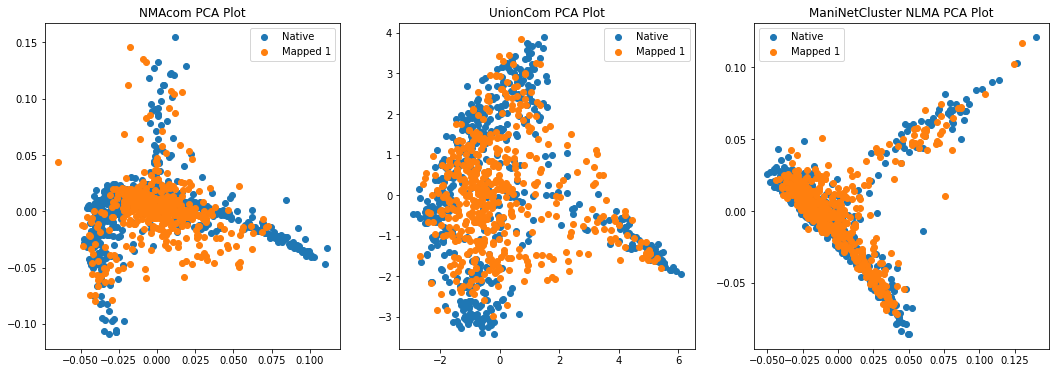

In [5]:
mappings = [nmacom_out, unioncom_out[0], maninetcluster_out[0]]
names = ['NMAcom', 'UnionCom', 'ManiNetCluster NLMA']

plt.subplots(figsize=(6*len(names), 6))
for i, mapping in enumerate(mappings):
    plt.subplot(1, len(names), i+1)
    alignment_visualize(*mapping, alg_name=names[i])